# Dataset preparation

In [1]:
#Import all library needed
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#confusion matrix visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
### 1. Link notebook with google drive and access data from your personal Gdrive
from google.colab import drive
drive.mount('/content/gdrive')

### 2.Set the data path for dataset and model location (ex: model_loc = "/content/gdrive/My Drive/Dataset/")
dataset_dir = "/content/gdrive/My Drive/ColabNotebooks/"
model_loc = "/content/gdrive/My Drive/ColabNotebooks/"

print(os.listdir(dataset_dir))
data = pd.read_csv(dataset_dir+'heart.csv')

Mounted at /content/gdrive
['sample_submission.csv', 'test.csv', 'train.csv', 'test_labels.csv', 'Entrez_inclassexe.ipynb', 'Entrez_inclassexe2.ipynb', 'Task2_PhangChengYi_GohYitian.ipynb', 'Task1_PhangChengYi_GohYitian.ipynb', 'In Group Activity 1.ipynb', 'PSM1_v1.ipynb', 'penguin_size.ipynb', 'penguin_lter.ipynb', 'PSM1_v2.ipynb', 'PSM1_v4.ipynb', 'heart.csv', 'PSM2_v3_arranged.ipynb', 'PSM2_v2_preprocessed_keyword.ipynb', 'PSM2_v1.ipynb', 'PSM1_v3.ipynb', 'BRCA_Copy Number Variation.csv', 'BioModelling_Project_BRCA_copy_number.ipynb', '[1_April_2024]_Heart_Disease_NN_PhangChengYi.ipynb']


In [ ]:
### 3. Insert Exploratory data analysis (EDA) steps to analyze and investigate datasets.

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
# Check out summary of statistics of numeric columns
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Check the data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Check missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
### 4. What is the purpose of the code that sets a list of categorical variables
### in a dataset and then casts those variables to the object data type using the astype() function?
###  The purpose is to convert specific columns in the Dataframe 'data' to the data type 'object' for each item in the list 'categorialList',
###  to ensure that these variables are treated as categorical variables for the following analysis or modeling process.

catagorialList = ['sex','cp','fbs','restecg','exang','ca','thal']
for item in catagorialList:
    data[item] = data[item].astype('object') #casting to object

In [9]:
 ### 5. Create more data by categorical variable into indicator variables using 'get_dummies' function
data = pd.get_dummies(data, drop_first=True)

In [10]:
### 6. Explain line 3,4 and 5 and print the shape of x and y
y = data['target'].values #take the target value
y = y.reshape(y.shape[0],1) #reshape y array into 1 dimension
x = data.drop(['target'],axis=1) #drop 'target' in x data
##
print(x.shape)
print(y.shape)

(303, 21)
(303, 1)


In [11]:
### 7. Create a simple dataset and demonstrate the normalization code on the simple dataset
data = pd.DataFrame({'A': [10,20,30], 'B': [100,200,300], 'C': [1000,2000,3000]})
print('Original dataset:')
print(data)


Original dataset:
    A    B     C
0  10  100  1000
1  20  200  2000
2  30  300  3000


In [12]:
### 8. Describe the heart dataset after implementing the min max normalization
#Normalize data (range 0 - 1)
minx = np.min(x)
maxx = np.max(x)
x = (x - minx) / (maxx - minx)
x.head()

,age,trestbps,chol,thalach,oldpeak,slope,sex_1,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.111702,0.257092,0.413121,0.265957,0.004078,0.000000,0.001773,0.000000,0.000000,0.001773,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.001773,0.000000,0.0
1,0.065603,0.230496,0.443262,0.331560,0.006206,0.000000,0.001773,0.000000,0.001773,0.000000,...,0.001773,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.001773,0.0
2,0.072695,0.230496,0.361702,0.304965,0.002482,0.003546,0.000000,0.001773,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.001773,0.0
3,0.099291,0.212766,0.418440,0.315603,0.001418,0.003546,0.001773,0.001773,0.000000,0.000000,...,0.001773,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.001773,0.0
4,0.101064,0.212766,0.627660,0.289007,0.001064,0.003546,0.000000,0.000000,0.000000,0.000000,...,0.001773,0.0,0.001773,0.0,0.0,0.0,0.0,0.000000,0.001773,0.0


In [13]:
### 9. Modify the code to split the dataset into train and test (train 70%, val 20% and test 10%).

# train 70%, validation 20%, test 10%
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)

# re-create train and validation set
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.33, random_state=42)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(212, 21)
(60, 21)
(31, 21)


# Original Model

In [14]:
model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=21, activation='softmax')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=16, verbose=1, callbacks=callbacks_list)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3521 (13.75 KB)
Trainable params: 3521 (13.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
14/14 [==============================] - 3s 39ms/step - loss: 0.2496 - acc: 0.5425 - val_loss: 0.2482 - val_acc: 0.5500
Epoch 2/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2484 - acc: 0.5425 - val_loss: 0.2478 - val_acc: 0.5500
Epoch 3/1000
14/14 [=

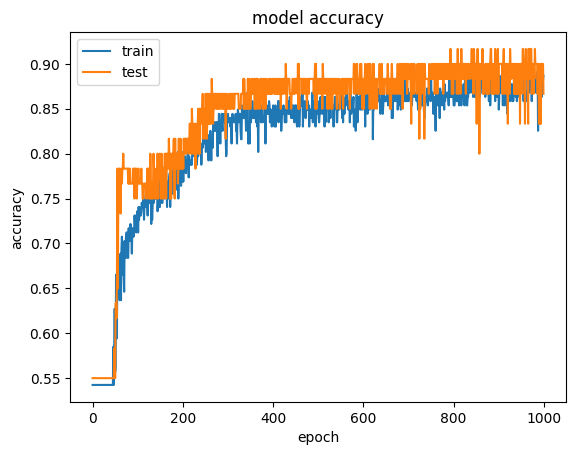

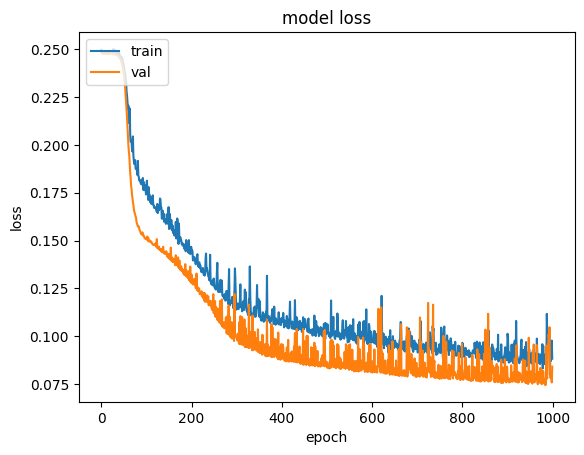

In [15]:
### Model accuracy
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

###  Model loss
plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('Loss.png',dpi=100) #to save the image
plt.show()

1/1 [==============================] - 0s 38ms/step - loss: 0.1996 - acc: 0.7419

acc: 74.19%
loss: 0.2
1/1 [==============================] - 0s 156ms/step
No: 1 Actual: [1]  Predicted: [1] Result: Pass
No: 2 Actual: [0]  Predicted: [1]  Result: Fail
No: 3 Actual: [0]  Predicted: [0] Result: Pass
No: 4 Actual: [1]  Predicted: [1] Result: Pass
No: 5 Actual: [0]  Predicted: [0] Result: Pass
No: 6 Actual: [0]  Predicted: [1]  Result: Fail
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [1]  Predicted: [1] Result: Pass
No: 9 Actual: [1]  Predicted: [1] Result: Pass
No: 10 Actual: [1]  Predicted: [1] Result: Pass
No: 11 Actual: [0]  Predicted: [0] Result: Pass
No: 12 Actual: [0]  Predicted: [0] Result: Pass
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [0]  Predicted: [0] Result: Pass
No: 18 Actual: [0]  Predicted: [0]

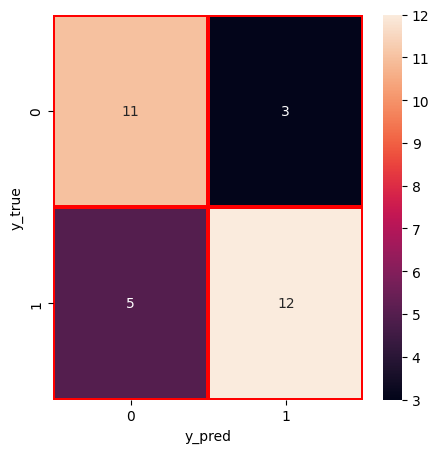


              precision    recall  f1-score   support

           0       0.69      0.79      0.73        14
           1       0.80      0.71      0.75        17

    accuracy                           0.74        31
   macro avg       0.74      0.75      0.74        31
weighted avg       0.75      0.74      0.74        31



In [16]:
#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl)

#Confusion matrix
y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

#Random Search

In [ ]:
!pip install scikeras

In [ ]:
# Use scikit-learn to perform random search
import numpy as np
import tensorflow as tf
import keras
import scikeras
from keras import Sequential
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier

In [ ]:
# Define your deep learning model
def build_model(neurons1=64, neurons2=32, learning_rate=0.01, activation1='softmax', activation2='softmax'):
    model = Sequential()
    model.add(Dense(neurons1, input_dim=21, activation=activation1))
    model.add(Dense(neurons2, activation=activation2))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    #compile model
    model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

    return model

# define the grid search parameters
param_dist = [
    {'model__activation1': ['relu'], 'model__activation2': ['softmax', 'relu'], 'optimizer__learning_rate': [0.001, 0.0001], 'model__neurons1': [128], 'model__neurons2': [32], 'batch_size': [32, 64]},
    {'model__activation1': ['relu'], 'model__activation2': ['softmax', 'relu'], 'optimizer__learning_rate': [0.001, 0.0001], 'model__neurons1': [64], 'model__neurons2': [64], 'batch_size': [32, 64]}
]

# Wrapping the model using KerasClassifier
model = KerasClassifier(build_fn=build_model, epochs=1000, verbose=0)

# perform random search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_jobs=-1)
random_result = random_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

best_model = None
best_score = 0

for i, (mean, stdev, param) in enumerate(zip(means, stds, params)):
    print("Model %d: %f (%f) with: %r" % (i+1, mean, stdev, param))
    if mean > best_score:
        best_score = mean
        best_model = i+1

print("Best Model is Model %d with score %f" % (best_model, best_score))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,977 (27.25 KB)

 Trainable params: 6,977 (27.25 KB)

 Non-trainable params: 0 (0.00 B)

Best: 0.837931 using {'optimizer__learning_rate': 0.001, 'model__neurons2': 32, 'model__neurons1': 128, 'model__activation2': 'relu', 'model__activation1': 'relu', 'batch_size': 32}
Model 1: 0.809606 (0.054191) with: {'optimizer__learning_rate': 0.0001, 'model__neurons2': 64, 'model__neurons1': 64, 'model__activation2': 'softmax', 'model__activation1': 'relu', 'batch_size': 64}
Model 2: 0.802709 (0.036719) with: {'optimizer__learning_rate': 0.0001, 'model__neurons2': 64, 'model__neurons1': 64, 'model__activation2': 'relu', 'model__activation1': 'relu', 'batch_size': 32}
Model 3: 0.802956 (0.041603) with: {'optimizer__learning_rate': 0.0001, 'model__neurons2': 64, 'model__neurons1': 64, 'model__activation2': 'softmax', 'model__activation1': 'relu', 'batch_size': 32}
Model 4: 0.803202 (0.060077) with: {'optimizer__learning_rate': 0.0001, 'model__neurons2': 32, 'model__neurons1': 128, 'model__activation2': 'softmax', 'model__activation1': 'relu', 'batch_size': 32}
Model 5: 0.837931 (0.036